Applying value iteration method to find policy for the Gambler's Problem described in Sutton and Barto chapter 4.

In [18]:
import pprint
import matplotlib.pyplot as plt

In [78]:
gambler_mdp={}
ph=0.25

In [82]:
#creating mdp for the problem
for state in range(0,101):
    transitions={}
    if (state==0 or state==100):
        transitions[0]=[(1,state,0)]
        gambler_mdp[state]=transitions
        continue
    for action in range(1,(1+min(state,100-state))):
        transitions[action] = [
            (ph, (state + action), 0) if (((state + action )!= 100)) else (ph, (state + action), 1),
            ((1-ph), (state-action),0)
        ]
    gambler_mdp[state]=transitions

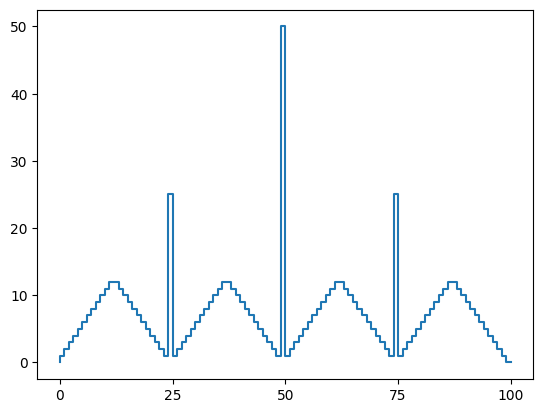

In [81]:
#implementing value iteration
theta=0.00001
delta=69
values=[0]*101
pi=[0]*101
gamma=1
while (delta>theta):
    delta=0
    for state in range(1,100):
        v=values[state]
        m=0
        for action in gambler_mdp[state]:
            new_value=0
            for case in gambler_mdp[state][action]:
                new_value+=(case[0]*(case[2]+(gamma*values[case[1]])))
            if (new_value>m):
                m=new_value
                pi[state]=action
        values[state]=m
        delta=max(delta,abs(v-values[state]))
plt.step(range(101), pi)
plt.xticks([i for i in range(0, 101, 25)])
plt.show()


Interpretation: It tries to reach target values 25,50,75,100.